In [1]:
import tensorflow as tf

In [2]:
 foo = tf.constant([-10, -5, 0.0, 5, 10], dtype = tf.float32)

In [3]:
tf.keras.activations.relu(foo).numpy()

array([ 0.,  0.,  0.,  5., 10.], dtype=float32)

In [4]:
import keras

Using TensorFlow backend.


In [5]:
from keras.datasets import mnist

In [6]:
data = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [7]:
(train_images, train_labels) , (test_images, test_labels) = data

In [8]:
len(train_images)

60000

In [9]:
len(test_images)

10000

In [10]:
train_images= train_images.reshape((60000,28, 28, 1))

In [11]:
test_images= test_images.reshape((10000,28,28,1))

In [12]:
train_images[0]

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
      

In [13]:
train_images=train_images.astype('float')/255   #normalization, converts 0 to 255 to 0 and 1

In [14]:
test_images=test_images.astype('float')/255

In [15]:
from keras.preprocessing import image

In [17]:
import matplotlib.pyplot as plt

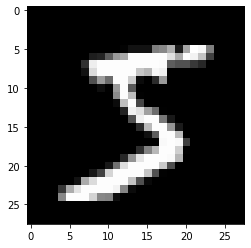

In [19]:
plt.imshow(image.array_to_img(train_images[0]), cmap="gray")

In [20]:
train_labels[0]

5

In [21]:
train_labels[10000]

3

In [22]:
from keras.utils import to_categorical

In [24]:
train_labels_original=train_labels

In [25]:
train_labels=to_categorical(train_labels)

In [26]:
train_labels_original[77]

1

In [28]:
train_labels[77]   #keras wants it in vectors

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [29]:
train_labels[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [30]:
test_labels_original=test_labels

In [31]:
test_labels=to_categorical(test_labels)

In [32]:
test_labels_original[0]

7

In [33]:
from keras import layers,models

In [34]:
model=models.Sequential()  #NN are sequential

In [35]:
model.add(layers.Conv2D(32, (3, 3), activation='relu' , input_shape=(28, 28, 1)))   #if image is color then use conv3D

In [36]:
model.summary()   #initially 28,28,1 to 32 filters of 3,3,1

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.add(layers.MaxPool2D((2, 2)))

In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.add(layers.Conv2D(64, (3,3), activation='relu'))

In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
Total params: 18,816
Trainable params: 18,816
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.add(layers.MaxPool2D((2,2)))

In [43]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
Total params: 18,816
Trainable params: 18,816
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.add(layers.Conv2D(64, (3,3), activation='relu'))

In [45]:
model.add(layers.Flatten()) #after flattening it makes no sense for convolution

In [47]:
model.add(layers.Dense(64, activation='relu'))  #means a normal layer

In [48]:
model.add(layers.Dense(10, activation='softmax'))  #10 neurons coz 0-9 is 10digits

In [50]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)               

In [58]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [59]:
model.fit(train_images, train_labels, epochs=20, batch_size=64)

Epoch 1/20
60000/60000 [==============================] - 15s 247us/step - loss: 0.1914 - accuracy: 0.9403
Epoch 2/20
60000/60000 [==============================] - 8s 138us/step - loss: 0.0481 - accuracy: 0.9849
Epoch 3/20
60000/60000 [==============================] - 8s 138us/step - loss: 0.0337 - accuracy: 0.9895
Epoch 4/20
60000/60000 [==============================] - 8s 139us/step - loss: 0.0260 - accuracy: 0.9920
Epoch 5/20
60000/60000 [==============================] - 8s 138us/step - loss: 0.0209 - accuracy: 0.9936
Epoch 6/20
60000/60000 [==============================] - 8s 138us/step - loss: 0.0160 - accuracy: 0.9950
Epoch 7/20
60000/60000 [==============================] - 8s 138us/step - loss: 0.0139 - accuracy: 0.9961
Epoch 8/20
60000/60000 [==============================] - 8s 138us/step - loss: 0.0119 - accuracy: 0.9966
Epoch 9/20
60000/60000 [==============================] - 8s 139us/step - loss: 0.0103 - accuracy: 0.9969
Epoch 10/20
60000/60000 [====================

In [60]:
test_loss, test_accuracy=model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 117us/step


In [61]:
test_accuracy

0.9915000200271606

In [71]:
predictions = model.predict_classes(test_images)

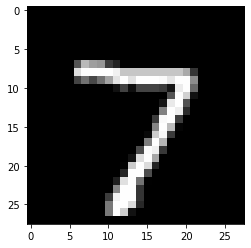

In [72]:
plt.imshow(image.array_to_img(test_images[0]), cmap="gray")

In [73]:
predictions[0]

7